# SVM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Aemf1.csv")

In [3]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [4]:
df.shape

(41714, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [6]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

Price


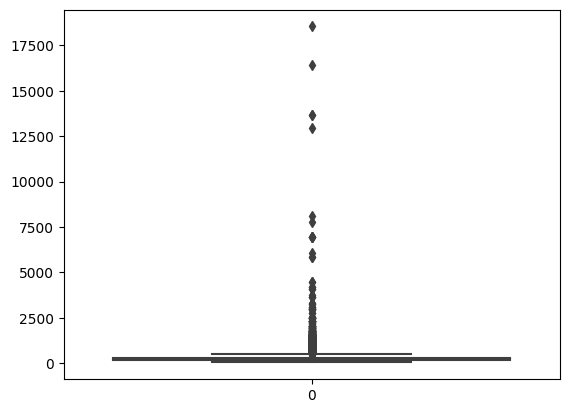

Person Capacity


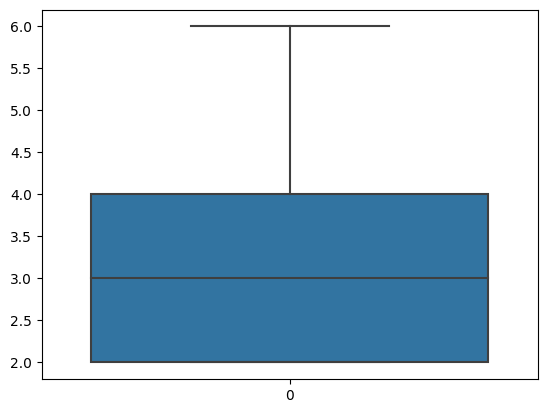

Multiple Rooms


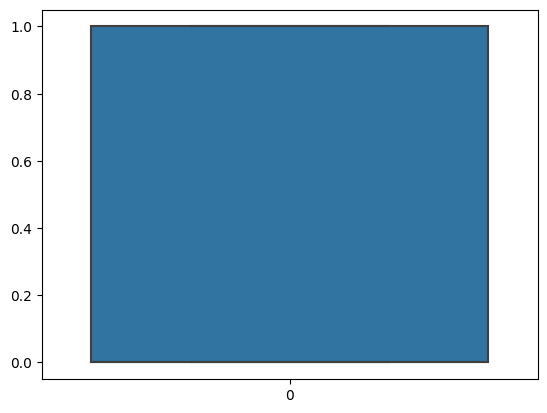

Business


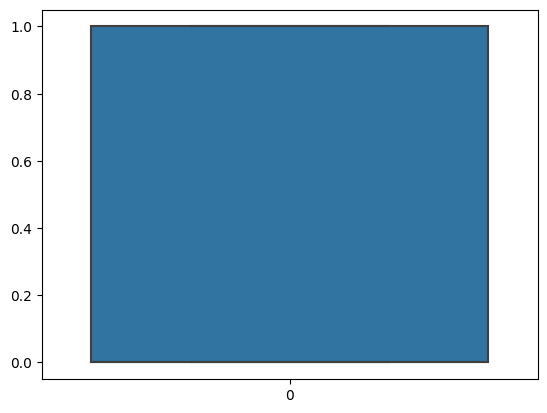

Cleanliness Rating


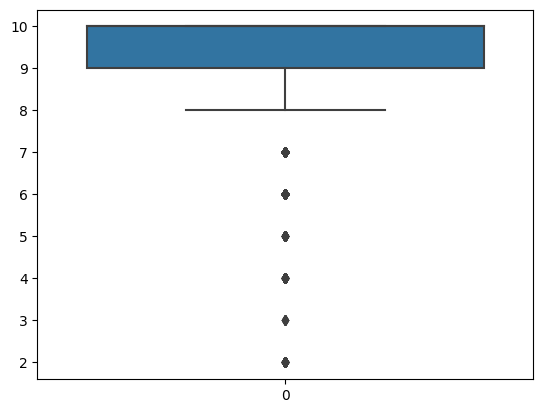

Guest Satisfaction


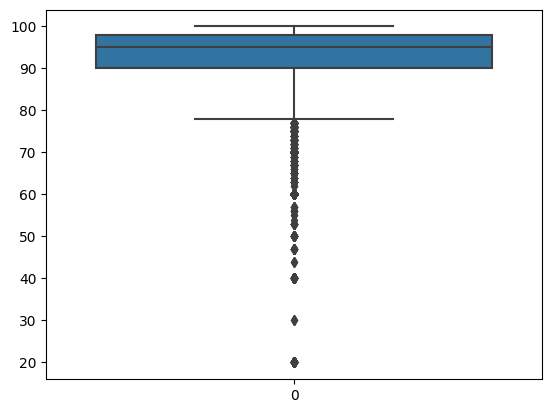

Bedrooms


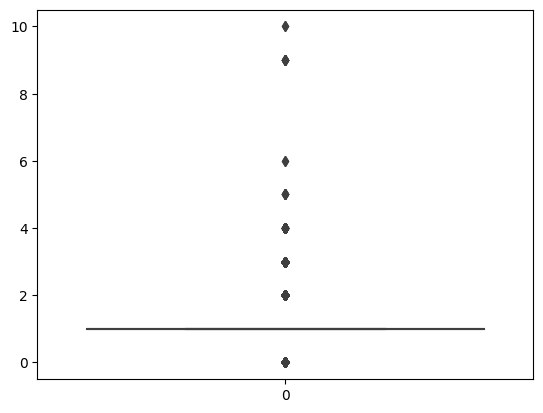

City Center (km)


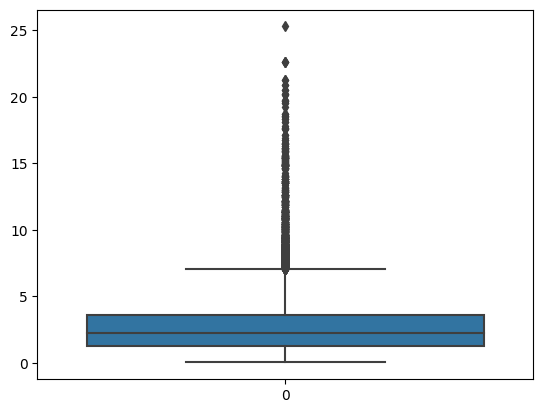

Metro Distance (km)


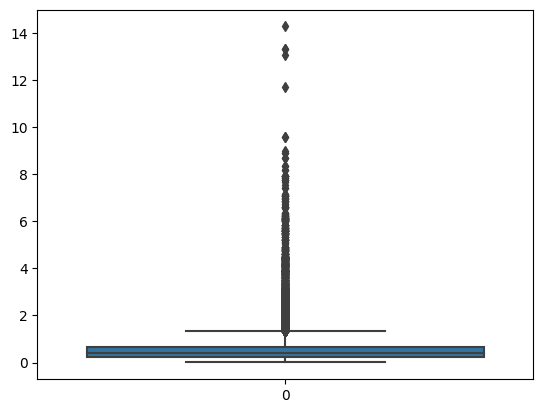

Attraction Index


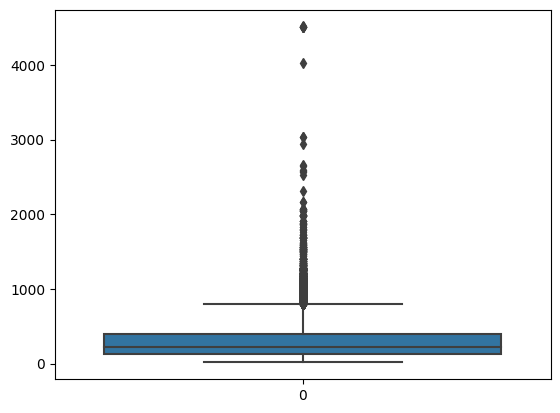

Normalised Attraction Index


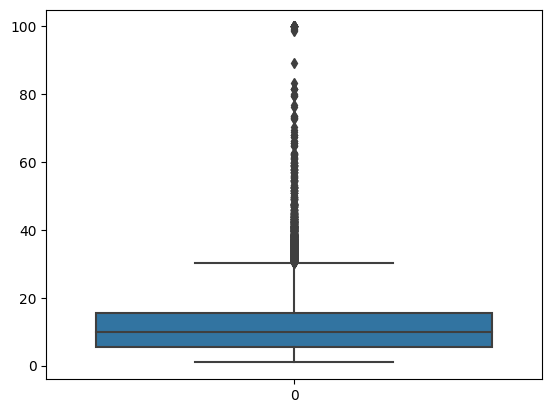

Restraunt Index


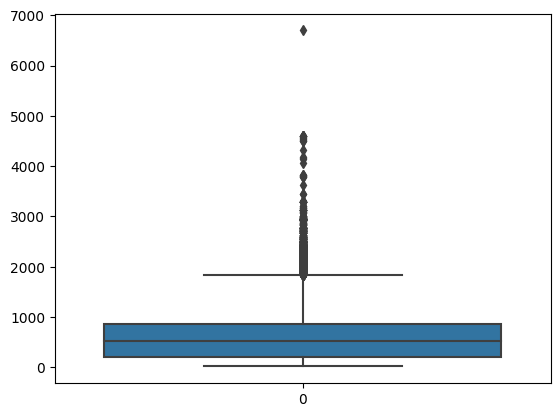

Normalised Restraunt Index


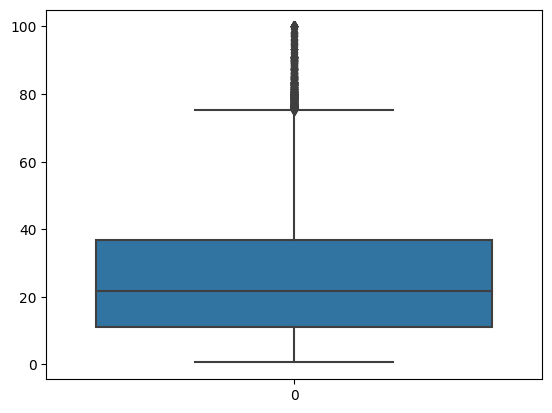

In [7]:
for i in df.columns:
  if df[i].dtypes=="float64" or df[i].dtypes=="int64":
   sns.boxplot(df[i])
   print(i)
   plt.show()

In [8]:
columns_outliers=["Price","City Center (km)","Metro Distance (km)","Attraction Index",
                  "Normalised Attraction Index","Restraunt Index","Normalised Restraunt Index"]

In [9]:
for col in columns_outliers:
 Q1=df[col].quantile(0.25)
 Q3=df[col].quantile(0.75)
 IQR= Q3-Q1
 lower_limit= Q1 - 1.5 *IQR
 upper_limit = Q3 + 1.5 * IQR
 df= df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]


Text(0, 0.5, 'Count')

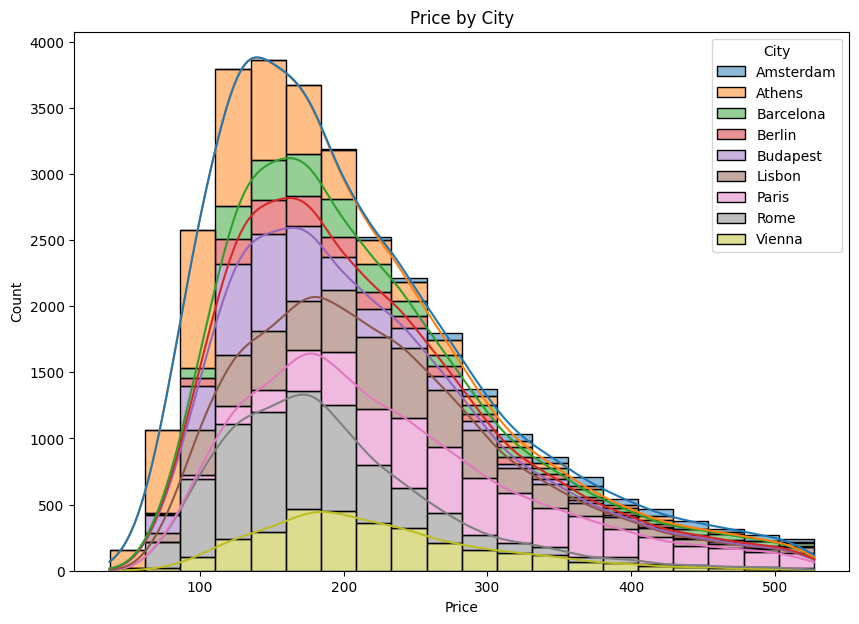

In [11]:
plt.figure(figsize = (10, 7))
sns.histplot(data = df, x = 'Price', hue = 'City', bins = 20, multiple = 'stack', kde = True)

plt.title('Price by City')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0.5, 0, 'Cleanliness Rating')

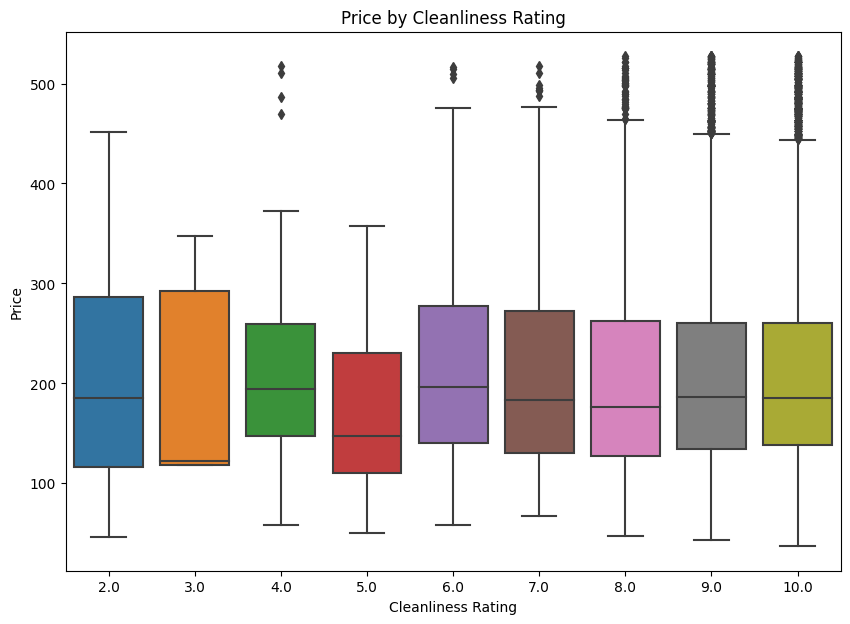

In [12]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Cleanliness Rating', y = 'Price', data=df)

plt.title('Price by Cleanliness Rating')
plt.ylabel('Price')
plt.xlabel('Cleanliness Rating')

Text(0.5, 0, 'Bedrooms')

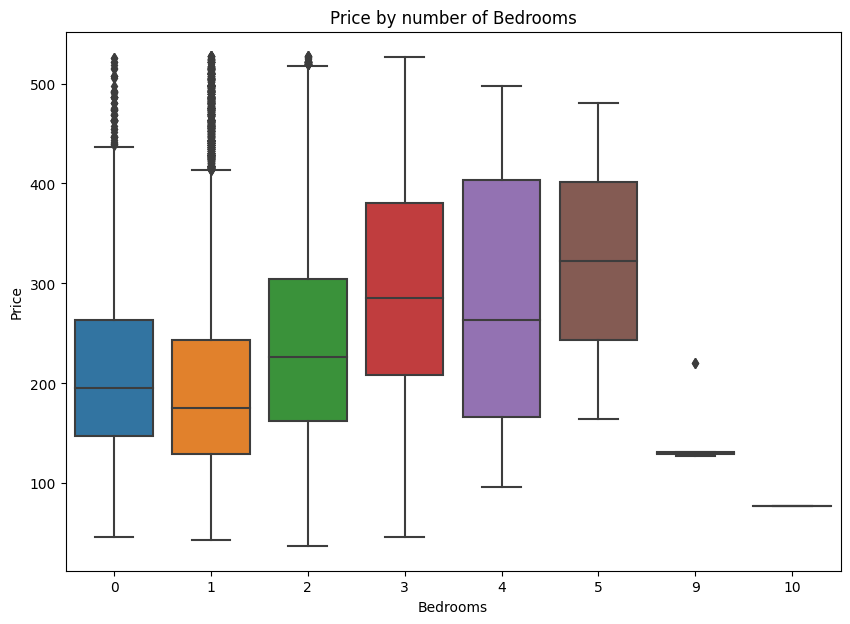

In [13]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Bedrooms', y = 'Price', data=df)

plt.title('Price by number of Bedrooms')
plt.ylabel('Price')
plt.xlabel('Bedrooms')

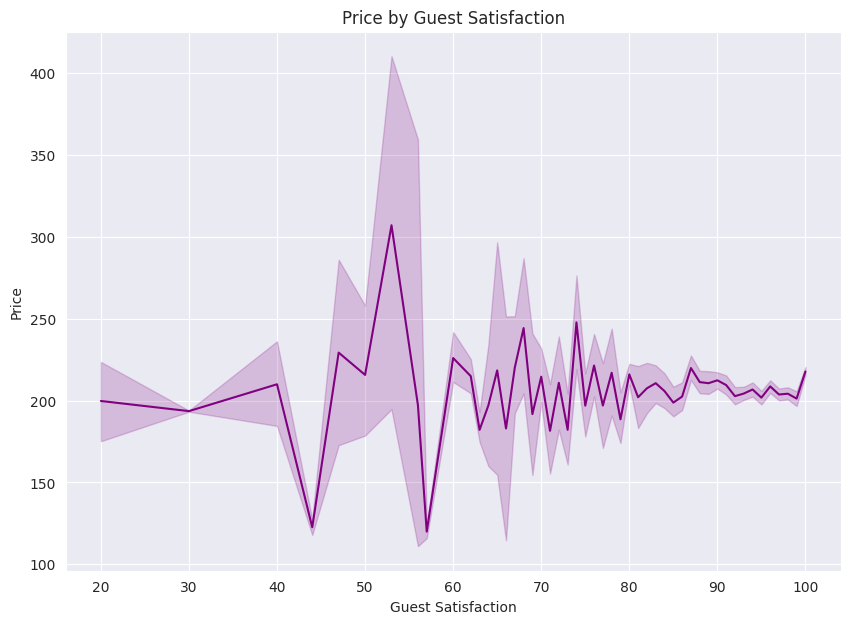

In [14]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')

sns.lineplot(x = 'Guest Satisfaction', y = 'Price', data = df, color = 'purple')

plt.title('Price by Guest Satisfaction')
plt.ylabel('Price')
plt.xlabel('Guest Satisfaction')

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
df["City"]=le.fit_transform(df["City"])
df["Day"]=le.fit_transform(df["Day"])
df["Room Type"]=le.fit_transform(df["Room Type"])
df["Shared Room"]=le.fit_transform(df["Shared Room"])
df["Private Room"]=le.fit_transform(df["Private Room"])
df["Superhost"]=le.fit_transform(df["Superhost"])

<Axes: >

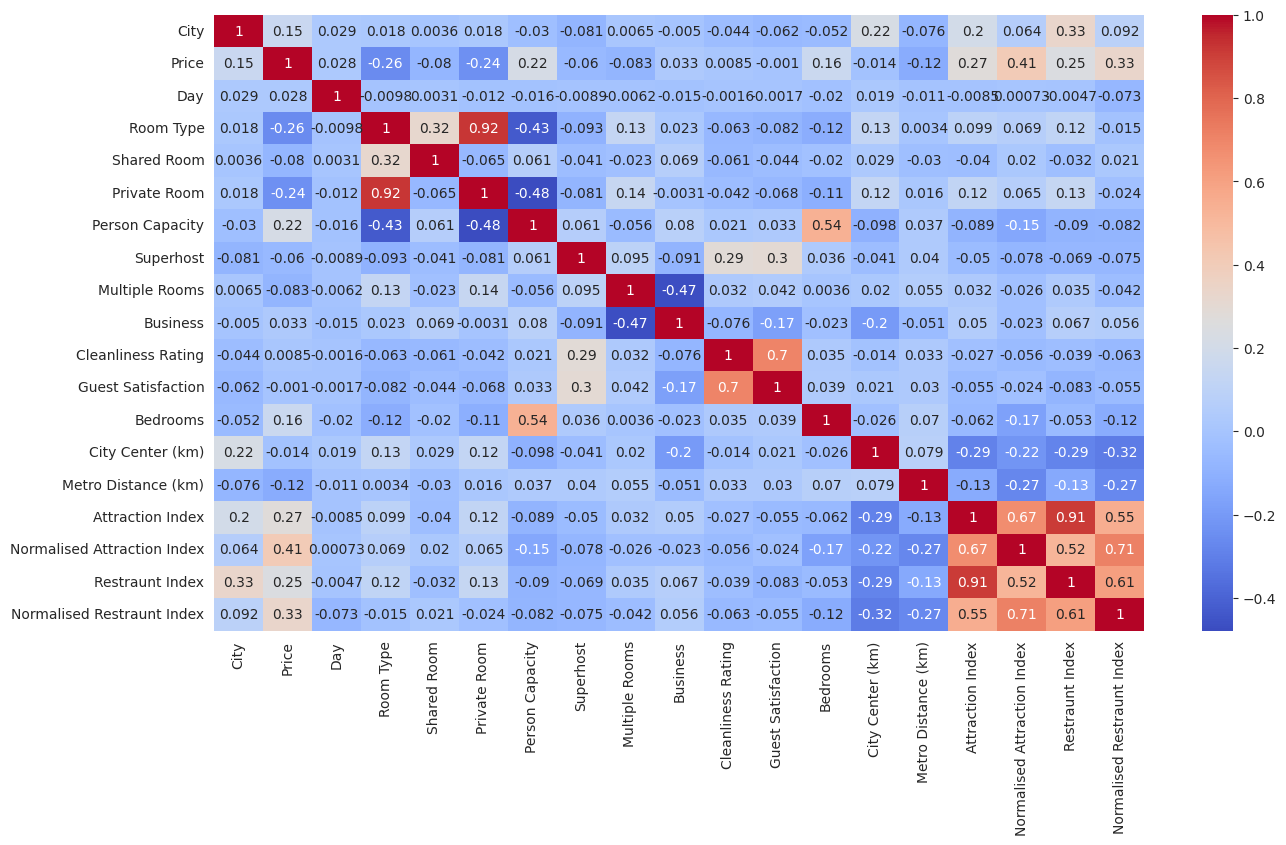

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31008 entries, 3 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         31008 non-null  int64  
 1   Price                        31008 non-null  float64
 2   Day                          31008 non-null  int64  
 3   Room Type                    31008 non-null  int64  
 4   Shared Room                  31008 non-null  int64  
 5   Private Room                 31008 non-null  int64  
 6   Person Capacity              31008 non-null  float64
 7   Superhost                    31008 non-null  int64  
 8   Multiple Rooms               31008 non-null  int64  
 9   Business                     31008 non-null  int64  
 10  Cleanliness Rating           31008 non-null  float64
 11  Guest Satisfaction           31008 non-null  float64
 12  Bedrooms                     31008 non-null  int64  
 13  City Center (km)

In [19]:
X=df.drop(columns=["Price"])
y=df[["Price"]]

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [23]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.38006815574781816

MSE is not working for this dataset

In [27]:
from sklearn.metrics import mean_squared_error
y_test = 10 ** y_test
y_pred = 10 ** y_pred
mean_squared_error(y_test,y_pred)

<ipython-input-27-3a996b9a2134>:3: RuntimeWarning: overflow encountered in power
  y_pred = 10 ** y_pred


ValueError: ignored

evaluation metrics - https://scikit-learn.org/stable/modules/model_evaluation.html

SVM - https://scikit-learn.org/stable/modules/svm.html